# Step 0 : Load the Data and imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns',100)
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
houses_prices = pd.read_csv("houses-prices.csv")
houses_prices

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

# Step 1: Start to understand them :
    
- In a business way (description, google, ...) 

- In a mathematical way (correlation between them, range, mean , type, ...)

## Data Cleaning

### NaN values cleaning

In [ ]:
# Print the columns with the most NA values
print(houses_prices.isna().sum().sort_values(axis=0, ascending=False))

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [ ]:
houses_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
objcolumns = list(filter(lambda col:houses_prices[col].dtype == np.object, houses_prices.columns))
numcolumns = list(filter(lambda col:houses_prices[col].dtype != np.object, houses_prices.columns))

In [ ]:
houses_prices[objcolumns].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


We store string columns in objcolumns and numerical columns in numcolumns. 

For numcolumns, we will apply 0 for NA values.

For objcolumns, we identified the columns where a NA value is a possible value based on data_description.txt.

As specified in data_description.txt, we will apply "NA" or "None" in string for NA values in objcolumns.

In [ ]:
houses_prices[numcolumns] = houses_prices[numcolumns].fillna(0)

In [ ]:
possible_na_columns = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageType","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature"]
houses_prices[possible_na_columns] = houses_prices[possible_na_columns].fillna("NA")
houses_prices["MasVnrType"] = houses_prices["MasVnrType"].fillna("None")

In [ ]:
print(houses_prices.isna().sum().sort_values(axis=0, ascending=False))

Electrical       1
SalePrice        0
Foundation       0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
BsmtQual         0
YearRemodAdd     0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
RoofStyle        0
YearBuilt        0
Heating          0
OverallCond      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
ScreenPorch      0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
PoolArea         0
GarageCars  

We can notice than the column "Electrical" contains also a null value even if this column is not supposed to have one.

That's why we will delete that unique row.

In [ ]:
houses_prices_no_nan = houses_prices.dropna(axis=0,how='any')

In [ ]:
print(houses_prices_no_nan.isna().sum().sort_values(axis=0, ascending=False))

SalePrice        0
Heating          0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
LandContour      0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
Utilities        0
OverallQual      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
TotalBsmtSF      0
HeatingQC        0
SaleCondition    0
CentralAir       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea    

## Describe and Info

In [ ]:
houses_prices_no_nan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1459 non-null   object 
 3   LotFrontage    1459 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          1459 non-null   object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1459 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [ ]:
houses_prices_no_nan.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,730.054832,56.881426,57.612748,10517.363948,6.100069,5.575737,1971.244003,1984.850583,103.187800,443.943797,46.581220,567.366004,1057.891021,1162.906785,346.791638,5.848526,1515.546950,0.425634,0.057574,1.564770,0.382454,2.866347,1.046607,6.517478,0.613434,1868.644962,1.766964,473.030158,94.240576,46.692255,21.969157,3.411926,15.071282,2.760795,43.518849,6.322824,2007.815627,180930.394791
std,421.411181,42.310746,34.673850,9984.666267,1.383171,1.113079,30.199555,20.644343,180.773158,456.106417,161.369977,441.992392,438.500975,386.572089,436.610637,48.639512,525.650927,0.518969,0.238830,0.550987,0.502798,0.816050,0.220410,1.625902,0.644687,453.838403,0.747546,213.869604,125.381679,66.267472,61.137400,29.327247,55.775138,40.191018,496.291826,2.704331,1.328542,79468.964025
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.500000,20.000000,42.000000,7549.000000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,796.000000,882.000000,0.000000,0.000000,1129.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1958.000000,1.000000,333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129950.000000
50%,730.000000,50.000000,63.000000,9477.000000,6.000000,5.000000,1973.000000,1994.000000,0.000000,384.000000,0.000000,479.000000,992.000000,1088.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1977.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1094.500000,70.000000,79.000000,11603.000000,7.000000,6.000000,2000.000000,2004.000000,164.500000,712.500000,0.000000,808.000000,1298.500000,1391.500000,728.000000,0.000000,1777.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Correlation Study

In [ ]:
corr = houses_prices_no_nan.corr()
corr_price = corr[['SalePrice']][:-1].abs().sort_values(['SalePrice'], ascending=[0])
corr_price

,SalePrice
OverallQual,0.791069
GrLivArea,0.708618
GarageCars,0.640473
GarageArea,0.623423
TotalBsmtSF,0.613905
1stFlrSF,0.605968
FullBath,0.560881
TotRmsAbvGrd,0.533779
YearBuilt,0.523273
YearRemodAdd,0.507430


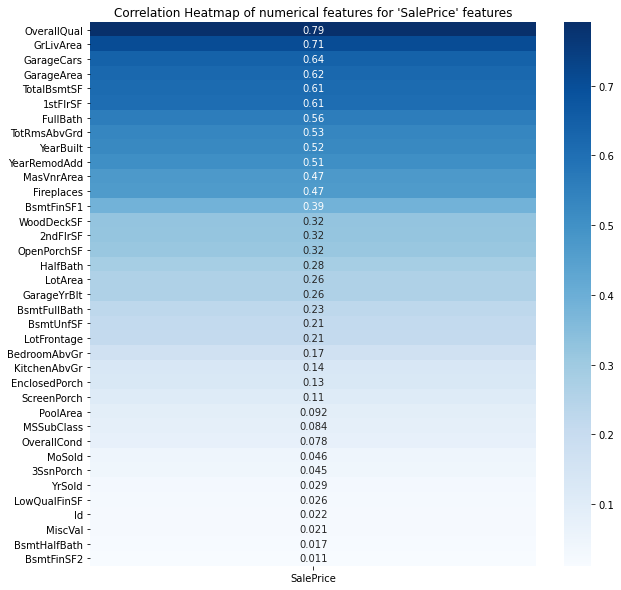

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
heat_map_corr = sns.heatmap(corr_price, annot=True, cmap='Blues')
heat_map_corr = heat_map_corr.set_title('Correlation Heatmap of numerical features for \'SalePrice\' features')



<br>


---






# Step 2 Regression problem
Choose a problem :
 - <u>**Price prediction based on caracteristic (Regression problem)**</u>
 - neighbourshood prediction based on caracteristic (Classification problem) 
 - other idea ?

We choose regression problem, we predict the price (SalePrice column)



---



# Step 3 (numerical features)
- Try a naive way to first get a firstscore (the least with no real improvement) :
  - Use the simplest algorithm
  - Use raw data (no improvement, don't use if it's not fitting)
   train and score using train test spliting


- measure the performances :
   - Score of prediction (choose depending on your probleme, precision or F1)
  - time to train
  - time to predict

 We will uses theses metrics to track our improvement :

Standardize the features

Extract output

In [ ]:
target_column = houses_prices_no_nan['SalePrice']

Extract features 

In [ ]:
num_features = houses_prices_no_nan[numcolumns]
num_features_houses = num_features.drop(columns='SalePrice')

In [ ]:
scaler = StandardScaler()

scaled_houses_num_features = scaler.fit_transform(num_features_houses)

Split the DataFrame

In [ ]:
X_train_naive, X_test_naive, y_train_naive, y_test_naive = train_test_split(scaled_houses_num_features, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

In [ ]:
start = time.time()
reg_naive = LinearRegression().fit(X_train_naive, y_train_naive)
end = time.time()
time_to_train = end - start
print("time to train ", time_to_train)

time to train  0.008809804916381836


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_naive.predict(X_test_naive)
end = time.time()
time_to_predict = end - start
print("time to predict ",time_to_predict)

df_predict_lr = pd.DataFrame({
    'Predict_price':np.rint(predict_price_lr),
    'True_price':y_test_naive,
    'Diff_percentage':np.round((predict_price_lr-y_test_naive)/y_test_naive*100,1)
})

df_predict_lr.head()

time to predict  0.0020580291748046875


,Predict_price,True_price,Diff_percentage
1321,40177.0,72500,-44.6
836,165635.0,153500,7.9
413,115208.0,115000,0.2
522,184058.0,159000,15.8
1035,52367.0,84000,-37.7


View the score : R² score

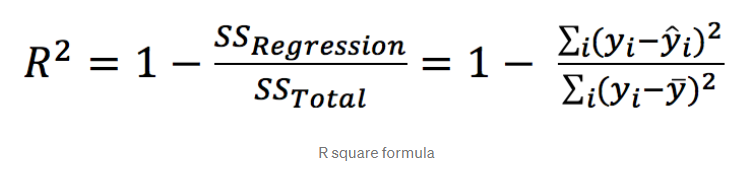

In [ ]:
score_lr_naive = reg_naive.score(X_test_naive, y_test_naive)
print('R² score = ',score_lr_naive)

R² score =  0.8712145284603087


**Metrics to compare Naive way** (all numerical features) 

In [ ]:
print('We obtain a score for all numerical features:', round(score_lr_naive, 3))
print('Time to train : ', round(time_to_train, 4) ,'ms')
print('Time to predict : ', round(time_to_predict, 4) ,'ms')
print('Shape of the data frame : ', len(num_features_houses),'*', len(num_features_houses.columns))
print('Memory size of the data frame: ', num_features_houses.memory_usage(index=True).sum()/1000,"KB")

We obtain a score for all numerical features: 0.871
Time to train :  0.0088 ms
Time to predict :  0.0021 ms
Shape of the data frame :  1459 * 37
Memory size of the data frame:  443.536 KB


# Step 4 (reduced numerical features)
- Try to reduced the dataset using a naive way (techniques seen in courses 2 - features selections)
- measure the naive algorithm performances on this REDUCED dataset:
  - Score of prediction (choose depending on your probleme, precision or F1)
  - time to train
  - size of reduced dataset

 We will uses theses metrics to track our improvement :

## Reduce the dataset

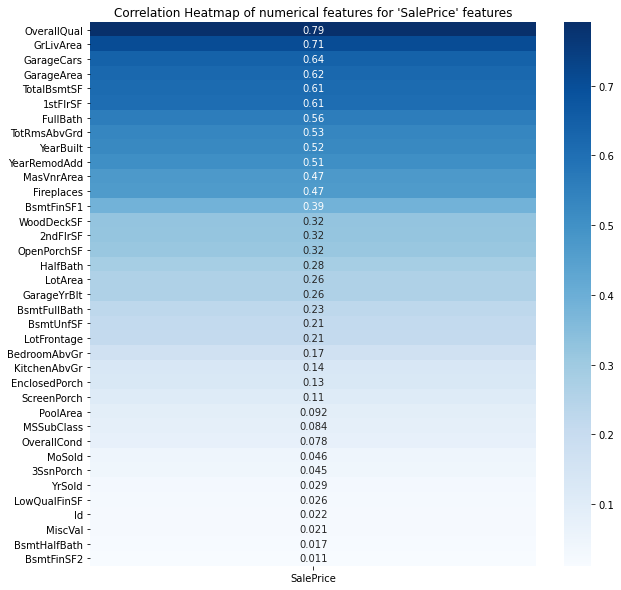

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
x = sns.heatmap(corr_price, annot=True, cmap='Blues')
x = x.set_title('Correlation Heatmap of numerical features for \'SalePrice\' features')

We select features with a correlation above 0.5 because a correlation of more than 0.5 is significant enough to have an influence on the price

Extract usefull features 

In [ ]:
high_features = corr_price[corr_price['SalePrice'] > 0.5]

In [ ]:
list_high_features = high_features.index.values.tolist()
print(list_high_features)
print('Nombre de features :', len(list_high_features))

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd']
Nombre de features : 10


We see the correlation between them in order to drop some of them

In [ ]:
corr_high_features = houses_prices_no_nan[list_high_features].corr()

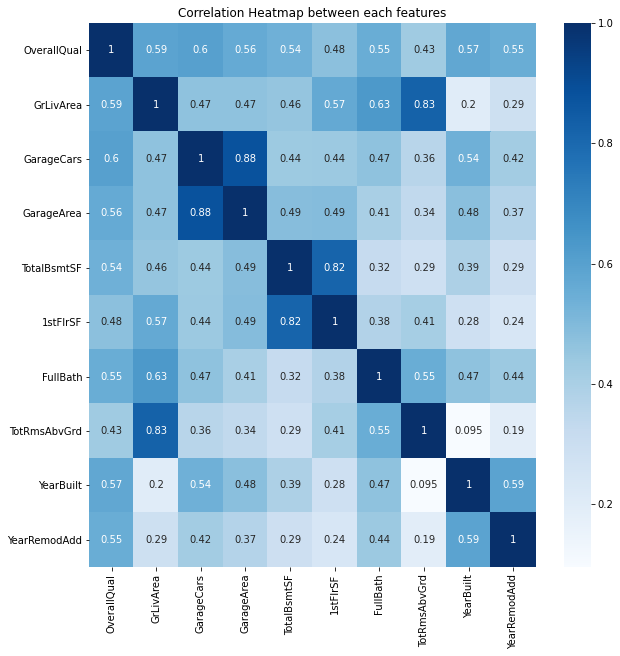

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
x = sns.heatmap(corr_high_features, annot=True, cmap='Blues')
x = x.set_title('Correlation Heatmap between each features')

 * We see that the features *GarageCars* and *GarageArea* are highly correlated.
We remove the feature **GarageArea**
 * The features *ToTRmsAbvGrd* and *GrdLiveArea* also highly correlated, we remove : **ToTRmsAbvGrd**
 * Finally the features *TotalBsmtSF* and *1stFIrSF* are highly correlated. We remove the **1stFIrSF** features

* We also remove the feature Yearbuilt because it is highly linked to the feature YearRemodAdd. YearRemodAdd brings additional information.

In [ ]:
features_to_remove = ['GarageArea', 'TotRmsAbvGrd', '1stFlrSF', 'YearBuilt']

We remove the redundant features

In [ ]:
list_highest_features = [features for features in list_high_features if features not in features_to_remove]
list_highest_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'TotalBsmtSF',
 'FullBath',
 'YearRemodAdd']

## Training the model

Get the DataFrame of the highest_correlated features

In [ ]:
house_features_reduced = houses_prices_no_nan[list_highest_features]

In [ ]:
scaler = StandardScaler()

scaled_house_features_reduced = scaler.fit_transform(house_features_reduced)

We split the dataset 

In [ ]:
X_train_reduced, X_test_reduced, y_train_reduced, y_test_reduced = train_test_split(scaled_house_features_reduced, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

In [ ]:
start = time.time()
reg_reduced_features = LinearRegression().fit(X_train_reduced, y_train_reduced)
end = time.time()
time_to_train_reduced = end - start
print("time to train ",time_to_train_reduced)

time to train  0.0025482177734375


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_reduced_features.predict(X_test_reduced)
end = time.time()
time_to_predict_reduced = end - start
print("time to predict ", time_to_predict_reduced)

df_predict_lr = pd.DataFrame({
    'Predict_price':np.rint(predict_price_lr),
    'True_price':y_test_reduced,
    'Diff_percentage':np.round((predict_price_lr-y_test_reduced)/y_test_reduced*100,1)
})

df_predict_lr.head()

time to predict  0.0006251335144042969


,Predict_price,True_price,Diff_percentage
1321,16502.0,72500,-77.2
836,175908.0,153500,14.6
413,122728.0,115000,6.7
522,171472.0,159000,7.8
1035,46750.0,84000,-44.3


View the score : R² score

In [ ]:
score_lr_reduced = reg_reduced_features.score(X_test_reduced, y_test_reduced)
print('R² score = ', score_lr_reduced)

R² score =  0.8376843642355429


**Metrics to compare** (reduced numerical features)

In [ ]:
print('We obtain a score for reduced numerical features :', round(score_lr_reduced, 3))
print('Time for train : ', round(time_to_train_reduced, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_reduced, 4) ,'ms')
print('Shape of the dataset : ', len(house_features_reduced),'*', len(house_features_reduced.columns))
print('Memory size of the dataset: ', house_features_reduced.memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for reduced numerical features : 0.838
Time for train :  0.0025 ms
Time to predict :  0.0006 ms
Shape of the dataset :  1459 * 6
Memory size of the dataset:  81.704 Kbit


# Step 5 (convert categorical to numerical values)
Based on you first discovery, clean and enhanced data :
  - convert label into number
  - add features (calculated from other, look on hide information )
  -  ...

## From Object Column to Numerical Column

In [ ]:
houses_prices_enhanced = pd.DataFrame()
houses_prices_enhanced[objcolumns] = houses_prices_no_nan[objcolumns].astype('category')

In [ ]:
houses_prices_enhanced[objcolumns] = houses_prices_enhanced[objcolumns].apply(lambda x: x.cat.codes)

Add numerical features

In [ ]:
houses_prices_enhanced[numcolumns] = houses_prices_no_nan[numcolumns]

In [ ]:
houses_prices_enhanced.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Step 6 ( on enhanced dataset)
- Try to improve your SCORE on ENHANCED dataset :
  - using your first algorithm
  - using other algorithm

- for each model/algorithm, measure the performances :
  - Score of prediction (choose depending on your probleme, precision or F1)
  - time to train
  - size of used dataset

##**Using all the features** (numerical and categorical features)

Standardize the features

In [ ]:
features_house_enhanced = houses_prices_enhanced.drop(columns='SalePrice')

In [ ]:
scaler = StandardScaler()

scaled_houses_features = scaler.fit_transform(features_house_enhanced)

Split the DataFrame

In [ ]:
X_train_enhanced_1, X_test_enhanced_1, y_train_enhanced_1, y_test_enhanced_1 = train_test_split(scaled_houses_features, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

Display the time to train and the comsumption

In [ ]:
start = time.time()
reg_enhanced_1 = LinearRegression().fit(X_train_enhanced_1, y_train_enhanced_1)
end = time.time()
time_to_train_enhanced_1 = end - start
print("time to train ", time_to_train_enhanced_1)

time to train  0.015643596649169922


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_enhanced_1.predict(X_test_enhanced_1)
end = time.time()
time_to_predict_enhanced_1 = end - start
print("time to predict ", time_to_predict_enhanced_1)

df_predict_lr = pd.DataFrame({
    'Predict_price':np.rint(predict_price_lr),
    'True_price':y_test_enhanced_1,
    'Diff_percentage':np.round((predict_price_lr-y_test_enhanced_1)/y_test_enhanced_1*100,1)
})

#df_predict_lr.head()

time to predict  0.004618406295776367


View the score : R² score

In [ ]:
score_lr_enhanced_1 = reg_enhanced_1.score(X_test_enhanced_1, y_test_enhanced_1)
print('R² score = ',score_lr_enhanced_1)

R² score =  0.8581751346528459


**Metrics to compare** (all features numerical and categorical)

In [ ]:
print('We obtain a score for enhanced 1 of :', round(score_lr_enhanced_1, 3))
print('Time to train : ', round(time_to_train_enhanced_1, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_enhanced_1, 4) ,'ms')
print('Shape of the data frame : ', len(features_house_enhanced),'*', len(features_house_enhanced.columns))
print('Memory size of the data frame: ', features_house_enhanced.memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for enhanced 1 of : 0.858
Time to train :  0.0156 ms
Time to predict :  0.0046 ms
Shape of the data frame :  1459 * 80
Memory size of the data frame:  506.273 Kbit


## **Using reduced features** (reduced categorical and numerical features)

Standardize the features

In [ ]:
features_house_enhanced = houses_prices_enhanced.drop(columns='SalePrice')

In [ ]:
scaler = StandardScaler()

scaled_houses_features = scaler.fit_transform(features_house_enhanced)

Create the DataFrame with the standardized features and the target

In [ ]:
houses_prices_enhanced_standardized = pd.DataFrame(data= scaled_houses_features, columns=features_house_enhanced.columns)
houses_prices_enhanced_standardized['SalePrice'] = target_column
houses_prices_enhanced_standardized.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-0.045548,0.06426,0.024707,0.751133,0.314785,-0.026189,0.604953,-0.225797,-1.205898,-0.036302,-0.031751,-0.411856,1.029276,-0.491725,-0.125841,0.743488,0.752029,-1.240823,-0.777372,0.364349,0.836085,-0.567196,0.325528,0.678602,-0.510180,0.344183,-0.123089,-0.884194,0.263909,0.302517,-0.409533,0.256071,-0.075143,-0.768309,0.102468,0.315721,0.295459,0.289852,0.063327,0.457637,-0.186041,0.313985,0.208577,-1.730625,0.073732,0.213123,-0.207125,0.650852,-0.517424,1.051899,0.879449,0.513594,0.574748,-0.28876,-0.944607,-0.460570,-0.794191,1.162093,-0.120284,0.370055,1.107124,-0.241148,0.790180,1.228641,0.163837,-0.211529,0.912128,-0.951848,0.296143,0.311842,0.350660,-0.751887,0.215983,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,0.138826,208500.0
1,-0.045548,0.06426,0.024707,0.751133,0.314785,-0.026189,-0.627765,-0.225797,1.957003,-1.187693,-0.031751,-0.411856,-0.542650,-0.491725,-0.125841,-0.507664,-0.660446,0.387199,0.663779,0.364349,-0.548533,-0.567196,0.325528,-1.235213,-1.398958,0.344183,-0.123089,-0.884194,0.263909,0.302517,0.795121,0.256071,1.637888,-0.768309,0.102468,0.315721,0.295459,0.289852,0.063327,0.457637,-0.186041,0.313985,0.208577,-1.728251,-0.871979,0.645874,-0.091909,-0.072372,2.178727,0.157540,-0.428864,-0.571009,1.171304,-0.28876,-0.641330,0.465629,0.256426,-0.794554,-0.120284,-0.482514,-0.820434,3.947370,0.790180,-0.760912,0.163837,-0.211529,-0.318380,0.599824,0.236630,0.311842,-0.060947,1.625670,-0.704845,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,-0.489318,-0.614137,181500.0
2,-0.045548,0.06426,0.024707,-1.378212,0.314785,-0.026189,0.604953,-0.225797,-1.205898,-0.036302,-0.031751,-0.411856,1.029276,-0.491725,-0.125841,0.743488,0.752029,-1.240823,-0.777372,0.364349,0.836085,-0.567196,0.325528,-0.597275,-0.510180,0.344183,-0.123089,-0.884194,0.263909,0.302517,-0.409533,0.256071,1.637888,-0.768309,0.102468,0.315721,0.295459,0.289852,0.063327,0.457637,-0.186041,0.313985,0.208577,-1.725878,0.073732,0.299673,0.073401,0.650852,-0.517424,0.985650,0.830993,0.325449,0.092239,-0.28876,-0.301842,-0.314568,-0.628576,1.189587,-0.120284,0.514687,1.107124,-0.241148,0.790180,1.228641,0.163837,-0.211529,-0.318380,0.599824,0.291735,0.311842,0.631301,-0.751887,-0.070832,-0.359464,-0.11638,-0.270308,-0.068715,-0.087718,0.990298,0.138826,223500.0
3,-0.045548,0.06426,0.024707,-1.378212,0.314785,-0.026189,-1.860483,-0.225797,-1.039430,-0.036302,-0.031751,-0.411856,1.029276,-0.491725,-0.125841,1.056276,1.317020,0.387199,0.663779,0.364349,-1.933151,0.997150,-2.833757,0.678602,-1.398958,0.344183,-0.123089,0.265573,0.263909,0.302517,-0.409533,0.256071,-0.931659,1.300843,0.942358,0.315721,0.295459,0.289852,0.063327,0.457637,-0.186041,0.313985,-3.425019,-1.723504,0.310159,0.068872,-0.096918,0.650852,-0.517424,-1.863050,-0.719600,-0.571009,-0.499931,-0.28876,-0.061936,-0.688698,-0.522480,0.937560,-0.120284,0.383376,1.107124,-0.241148,-1.025367,-0.760912,0.163837,-0.211529,0.296874,0.599824,0.285122,1.650010,0.790331,-0.751887,-0.176501,4.091057,-0.11638,-0.270308,-0.068715,-0.087718,-1.599030,-1.367100,140000.0
4,-0.045548,0.06426,0.024707,-1.378212,0.314785,-0.026189,-0.627765,-0.

### Reduce the dataset

In [ ]:
corr = houses_prices_enhanced_standardized.corr()
corr_price_all_features = corr[['SalePrice']][:-1].abs().sort_values(['SalePrice'], ascending=[0])

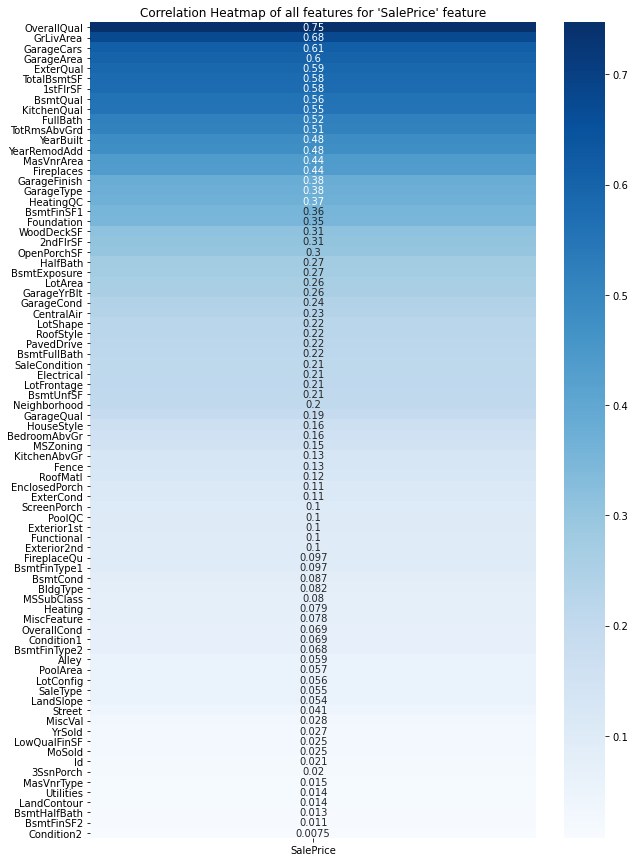

In [ ]:
fig, ax = plt.subplots(figsize=(10,15))
x = sns.heatmap(corr_price_all_features, annot=True, cmap='Blues')
x = x.set_title('Correlation Heatmap of all features for \'SalePrice\' feature')

We select features with a correlation above 0.5 because a correlation of more than 0.5 is significant enough to have an influence on the price

Extract usefull features 

In [ ]:
high_all_features = corr_price_all_features[corr_price_all_features['SalePrice'] > 0.5]
high_all_features

,SalePrice
OverallQual,0.747171
GrLivArea,0.675985
GarageCars,0.613338
GarageArea,0.601701
ExterQual,0.588779
TotalBsmtSF,0.581956
1stFlrSF,0.575978
BsmtQual,0.556779
KitchenQual,0.554780
FullBath,0.519224


In [ ]:
list_all_high_features = high_all_features.index.values.tolist()
print(list_all_high_features)
print('Nombre de features :', len(list_all_high_features))

['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'ExterQual', 'TotalBsmtSF', '1stFlrSF', 'BsmtQual', 'KitchenQual', 'FullBath', 'TotRmsAbvGrd']
Nombre de features : 11


We see the correlation between them in order to drop some of them

In [ ]:
corr_high_features = houses_prices_enhanced[list_all_high_features].corr()

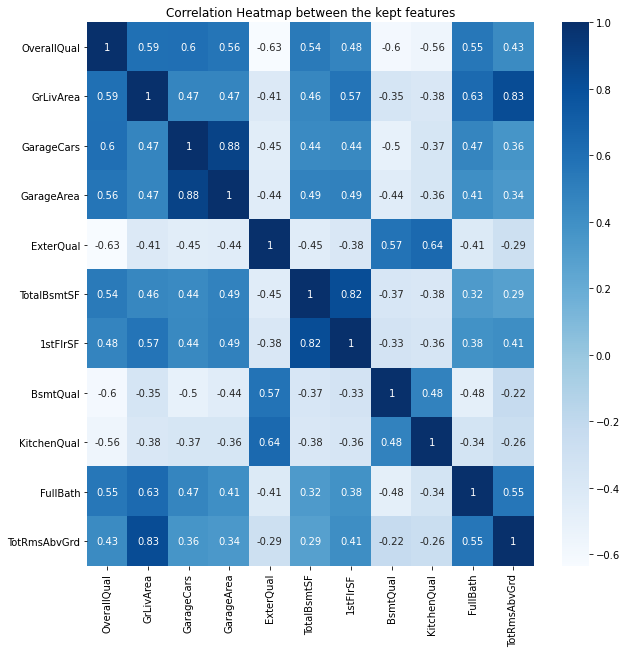

In [ ]:
fig, ax = plt.subplots(figsize=(10,10)) 
x = sns.heatmap(corr_high_features, annot=True, cmap='Blues')
x = x.set_title('Correlation Heatmap between the kept features')

 * We see that the features *GarageCars* and *GarageArea* are highly correlated.
We remove the feature **GarageArea**
 * The features *ToTRmsAbvGrd* and *GrdLiveArea* also highly correlated, we remove : **ToTRmsAbvGrd**
 * Finally the features *TotalBsmtSF* and *1stFIrSF* are highly correlated. We remove the **1stFIrSF** features

In [ ]:
features_to_remove = ['GarageArea',  'TotRmsAbvGrd', '1stFlrSF']

We remove the redundant features

In [ ]:
list_all_highest_features = [features for features in list_all_high_features if features not in features_to_remove]
list_all_highest_features

['OverallQual',
 'GrLivArea',
 'GarageCars',
 'ExterQual',
 'TotalBsmtSF',
 'BsmtQual',
 'KitchenQual',
 'FullBath']

### Training the model

Get the DataFrame of the highest_correlated features with the standardized DataFrame

In [ ]:
features_house_enhanced_2 = houses_prices_enhanced_standardized[list_all_highest_features]

We split the dataset 

In [ ]:
X_train_enhanced_2, X_test_enhanced_2, y_train_enhanced_2, y_test_enhanced_2 = train_test_split(features_house_enhanced_2, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

Display the time to train and the comsumption

In [ ]:
start = time.time()
reg_enhanced_2 = LinearRegression().fit(X_train_enhanced_2, y_train_enhanced_2)
end = time.time()
time_to_train_enhanced_2 = end - start
print("time to train ", time_to_train_enhanced_2)

time to train  0.002887248992919922


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_enhanced_2.predict(X_test_enhanced_2)
end = time.time()
time_to_predict_enhanced_2 = end - start
print("time to predict ",time_to_predict_enhanced_2)

df_predict_lr = pd.DataFrame({
    'Predict_price':np.rint(predict_price_lr),
    'True_price':y_test_enhanced_2,
    'Diff_percentage':np.round((predict_price_lr-y_test_enhanced_2)/y_test_enhanced_2*100,1)
})

#df_predict_lr.head()

time to predict  0.0019130706787109375


View the score : R² score

In [ ]:
score_lr_enhanced_2 = reg_enhanced_2.score(X_test_enhanced_2, y_test_enhanced_2)
print('R² score = ', score_lr_enhanced_2)

R² score =  0.8502955218800992


**Metrics to compare** (features reduced with numerical and categorical)

In [ ]:
print('We obtain a score for enhanced 2 of :', round(score_lr_enhanced_2, 3))
print('Time to train : ', round(time_to_train_enhanced_2, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_enhanced_2, 4) ,'ms')
print('Shape of the data frame : ', len(features_house_enhanced_2),'*', len(features_house_enhanced_2.columns))
print('Memory size of the data frame: ', features_house_enhanced_2.memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for enhanced 2 of : 0.85
Time to train :  0.0029 ms
Time to predict :  0.0019 ms
Shape of the data frame :  1459 * 8
Memory size of the data frame:  93.504 Kbit


# Step 7 (PCA method)
- Try to reduced the dataset using a smarter technique (SVD, FA, PCA)

- Try to improve your SCORE, TIME TRAINED on ENHANCED dataset :
  - using your first algorithm
  - using other algorithm

- For each model/algorithm, measure the performances with your REDUCED dataset:
  - core of prediction (choose depending on your probleme, precision or F1)
  - time to train
  - size of reduced dataset

## Using all features (numerical and categorical)

Standardize the features

In [ ]:
features_house_enhanced = houses_prices_enhanced.drop(columns='SalePrice')

In [ ]:
scaler = StandardScaler()

scaled_houses_features = scaler.fit_transform(features_house_enhanced)

Define the number of components

In [ ]:
pca = PCA(n_components=80)

# fit the scaled data in this model
pca.fit(scaled_houses_features)

# Create a new dataset composed by the 16 previously calculated components
new_data_set_pca_80_comp = pca.transform(scaled_houses_features)

We split the dataset 

In [ ]:
X_train_pca_1_80_comp, X_test_pca_1_80_comp, y_train_pca_1_80_comp, y_test_pca_1_80_comp = train_test_split(new_data_set_pca_80_comp, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

In [ ]:
start = time.time()
reg_enhanced_pca_1_80_comp = LinearRegression().fit(X_train_pca_1_80_comp, y_train_pca_1_80_comp)
end = time.time()
time_to_train_pca_1_80_comp = end - start
print("time to train ", time_to_train_pca_1_80_comp)

time to train  0.013928890228271484


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_enhanced_pca_1_80_comp.predict(X_test_pca_1_80_comp)
end = time.time()
time_to_predict_pca_1_80_comp = end - start
print("time to predict ",time_to_predict_pca_1_80_comp)

time to predict  0.00039577484130859375


View the score : R² score

In [ ]:
score_lr_enhanced_pca_1_80_comp = reg_enhanced_pca_1_80_comp.score(X_test_pca_1_80_comp, y_test_pca_1_80_comp)
print('R² score = ', score_lr_enhanced_pca_1_80_comp)

R² score =  0.8582459218177871


**Metrics to compare** (PCA method on 80 components)

In [ ]:
print('We obtain a score for pca method on non reduced data frame :', round(score_lr_enhanced_pca_1_80_comp, 3))
print('Time to train : ', round(time_to_train_pca_1_80_comp, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_pca_1_80_comp, 4) ,'ms')
print('Shape of the data frame : ', new_data_set_pca_80_comp.shape)
print('Memory size of the data frame: ', pd.DataFrame(new_data_set_pca_80_comp).memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for pca method on non reduced data frame : 0.858
Time to train :  0.0139 ms
Time to predict :  0.0004 ms
Shape of the data frame :  (1459, 80)
Memory size of the data frame:  933.888 Kbit


Plot the graph to see how many features we have to retain to keep 90% of the information

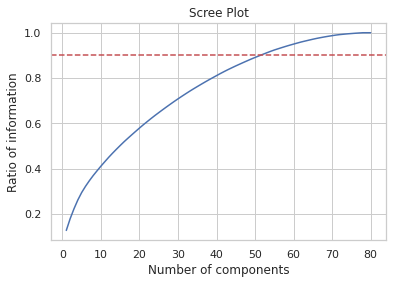

In [ ]:
# Create a seaborn barplto in order to display the explained variance ratio per Component
# use the explained_variance_ratio_ attributes of your pca model's

explained_variance_ratio = pca.explained_variance_ratio_

x = np.arange(1,81)

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax_reduced = sns.lineplot(x=x, y=explained_variance_ratio.cumsum())
ax_reduced.set(xlabel='Number of components', ylabel='Ratio of information')
ax_reduced.set_title('Scree Plot')
ax_reduced.axhline(0.9, ls='--',color="r")

We choose 50 components because we see in the graph that we keep 90% of the information for 50 components.

In [ ]:
# Create a PCA model in oder to composed the 50 components
pca = PCA(n_components=50)

# fit the scaled data in this model
pca.fit(scaled_houses_features)

# Create a new dataset composed by the 50 previously calculated components
new_data_set_pca_50_comp = pca.transform(scaled_houses_features)

We split the dataset 

In [ ]:
X_train_pca_1_50_comp, X_test_pca_1_50_comp, y_train_pca_1_50_comp, y_test_pca_1_50_comp = train_test_split(new_data_set_pca_50_comp, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

In [ ]:
start = time.time()
reg_enhanced_pca_1_50_comp = LinearRegression().fit(X_train_pca_1_50_comp, y_train_pca_1_50_comp)
end = time.time()
time_to_train_pca_1_50_comp = end - start
print("time to train ", time_to_train_pca_1_50_comp)

time to train  0.014165401458740234


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
predict_price_lr = reg_enhanced_pca_1_50_comp.predict(X_test_pca_1_50_comp)
end = time.time()
time_to_predict_pca_1_50_comp = end - start
print("time to predict ",time_to_predict_pca_1_50_comp)

time to predict  0.0024955272674560547


View the score : R² score

In [ ]:
score_lr_enhanced_pca_1_50_comp = reg_enhanced_pca_1_50_comp.score(X_test_pca_1_50_comp, y_test_pca_1_50_comp)
print('R² score = ', score_lr_enhanced_pca_1_50_comp)

R² score =  0.8775904635347177


**Metrics to compare** (PCA method on 50 components)

In [ ]:
print('We obtain a score for pca method on non reduced data frame :', round(score_lr_enhanced_pca_1_50_comp, 3))
print('Time to train : ', round(time_to_train_pca_1_50_comp, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_pca_1_50_comp, 4) ,'ms')
print('Shape of the data frame : ', new_data_set_pca_50_comp.shape)
print('Memory size of the data frame: ', pd.DataFrame(new_data_set_pca_50_comp).memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for pca method on non reduced data frame : 0.878
Time to train :  0.0142 ms
Time to predict :  0.0025 ms
Shape of the data frame :  (1459, 50)
Memory size of the data frame:  583.728 Kbit


## Using reduced dataset

Get the reduced standardized enhanced DataFrame features

In [ ]:
features_house_enhanced_reduced_standardized = houses_prices_enhanced_standardized[list_all_highest_features]

In [ ]:
features_house_enhanced_reduced_standardized.shape

(1459, 8)

In [ ]:
pca = PCA(n_components=8)

# fit the scaled data in this model
pca.fit(features_house_enhanced_reduced_standardized)

# Create a new dataset composed by the 16 previously calculated components
new_data_set_pca = pca.transform(features_house_enhanced_reduced_standardized)

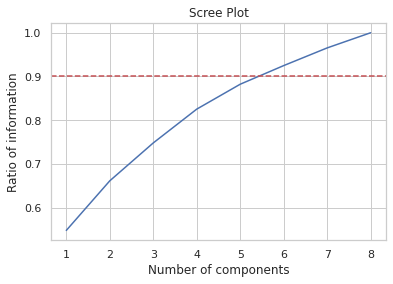

In [ ]:
# Create a seaborn barplto in order to display the explained variance ratio per Component
# use the explained_variance_ratio_ attributes of your pca model's

explained_variance_ratio = pca.explained_variance_ratio_

x = np.arange(1,9)

import seaborn as sns
sns.set_theme(style="whitegrid")
tips = sns.load_dataset("tips")
ax_3 = sns.lineplot(x=x, y=explained_variance_ratio.cumsum())
ax_3.set(xlabel='Number of components', ylabel='Ratio of information', title='Scree Plot')
ax_3.set_title('Scree Plot')
ax_3.axhline(0.9, ls='--',color="r")


We choose 5 components

In [ ]:
# Create a PCA model in oder to composed the 5 components
pca = PCA(n_components=5)

# fit the scaled data in this model
pca.fit(features_house_enhanced_reduced_standardized)

# Create a new dataset composed by the 5 previously calculated components
new_reduced_data_set_pca = pca.transform(features_house_enhanced_reduced_standardized)

We split the dataset 

In [ ]:
X_train_pca_2, X_test_pca_2, y_train_pca_2, y_test_pca_2 = train_test_split(new_reduced_data_set_pca, target_column, test_size=0.20, random_state=42)

Create linear Regression object and fit on the train set

In [ ]:
start = time.time()
reg_enhanced_pca_2 = LinearRegression().fit(X_train_pca_2, y_train_pca_2)
end = time.time()
time_to_train_pca_2 = end - start
print("time to train ", time_to_train_pca_2)

time to train  0.002023458480834961


Predict on the test set and see the difference between the predict and the true price

In [ ]:
start = time.time()
reg_enhanced_pca_2.predict(X_test_pca_2)
end = time.time()
time_to_predict_pca_2 = end - start
print("time to predict ",time_to_predict_pca_2)

time to predict  0.00042891502380371094


View the score : R² score

In [ ]:
score_lr_enhanced_pca_2 = reg_enhanced_pca_2.score(X_test_pca_2, y_test_pca_2)
print('R² score = ', score_lr_enhanced_pca_2)

R² score =  0.8312297036194796


**Metrics to compare** (PCA method on reduce data set (5 components))

In [ ]:
print('We obtain a score for pca method on reduced data frame :', round(score_lr_enhanced_pca_2, 3))
print('Time for train : ', round(time_to_train_pca_2, 4) ,'ms')
print('Time to predict : ', round(time_to_predict_pca_2, 4) ,'ms')
print('Shape of the data frame : ', new_reduced_data_set_pca.shape)
print('Memory size of the data frame: ', pd.DataFrame(new_reduced_data_set_pca).memory_usage(index=True).sum()/1000 ,'Kbit')

We obtain a score for pca method on reduced data frame : 0.831
Time for train :  0.002 ms
Time to predict :  0.0004 ms
Shape of the data frame :  (1459, 5)
Memory size of the data frame:  58.488 Kbit


# Step 8 
Choose the best reduced algorithm based on metrics (score, time computing, size)

Explain the business signification for any Feature/ Factor/ Component of this reduced data set

In [ ]:
score_r2 = np.array([score_lr_naive, score_lr_reduced, score_lr_enhanced_1, 
            score_lr_enhanced_2, score_lr_enhanced_pca_1_80_comp, 
            score_lr_enhanced_pca_1_50_comp, score_lr_enhanced_pca_2]).round(3) * 100

time_train = np.array([time_to_train, time_to_train_reduced, time_to_train_enhanced_1,
              time_to_train_enhanced_2, time_to_train_pca_1_80_comp,
              time_to_train_pca_1_50_comp, time_to_train_pca_2]).round(4)

time_predict = np.array([time_to_predict, time_to_predict_reduced, time_to_predict_enhanced_1,
              time_to_predict_enhanced_2, time_to_predict_pca_1_80_comp,
              time_to_predict_pca_1_50_comp, time_to_predict_pca_2]).round(4)

shape = np.array(['{} * {}'.format(len(num_features_houses), len(num_features_houses.columns)),
         '{} * {}'.format(len(house_features_reduced), len(house_features_reduced.columns)),
         '{} * {}'.format(len(features_house_enhanced), len(features_house_enhanced.columns)),
         '{} * {}'.format(len(features_house_enhanced_2), len(features_house_enhanced_2.columns)),
         '{} * {}'.format(new_data_set_pca_80_comp.shape[0], new_data_set_pca_80_comp.shape[1]),
         '{} * {}'.format(new_data_set_pca_50_comp.shape[0],  new_data_set_pca_50_comp.shape[1]),
         '{} * {}'.format(new_reduced_data_set_pca.shape[0],  new_reduced_data_set_pca.shape[1])
         ])

memory = np.array([num_features_houses.memory_usage(index=True).sum(),
          house_features_reduced.memory_usage(index=True).sum(),
          features_house_enhanced.memory_usage(index=True).sum(),
          features_house_enhanced_2.memory_usage(index=True).sum(),
          pd.DataFrame(new_data_set_pca_80_comp).memory_usage(index=True).sum(),
          pd.DataFrame(new_data_set_pca_50_comp).memory_usage(index=True).sum(),
          pd.DataFrame(new_reduced_data_set_pca).memory_usage(index=True).sum()])/1000

index_name = ['Step 3 (numerical features)', 'Step 4 (reduced numerical features)',
         'Step 6 (Using all features)', 'Step 6 (Using reduced features)',
         'Step 7 PCA with 80 components', 'Step 7 PCA with 50 components', 'Step 7 PCA on reduced data set with 5 components']

df_compare_metrics = pd.DataFrame({'Score R² (%)':score_r2,
                                    'Time to train (ms)':time_train,
                                    'Time to predict (ms)':time_predict,
                                    'Shape of the dataset':shape,
                                    'Memory size of the data frame (kbit)':memory
                                }, index = index_name)
df_compare_metrics

,Score R² (%),Time to train (ms),Time to predict (ms),Shape of the dataset,Memory size of the data frame (kbit)
Step 3 (numerical features),87.1,0.0088,0.0021,1459 * 37,484.496
Step 4 (reduced numerical features),83.8,0.0025,0.0006,1459 * 6,122.664
Step 6 (Using all features),85.8,0.0156,0.0046,1459 * 80,547.233
Step 6 (Using reduced features),85.0,0.0029,0.0019,1459 * 8,93.504
Step 7 PCA with 80 components,85.8,0.0139,0.0004,1459 * 80,933.888
Step 7 PCA with 50 components,87.8,0.0142,0.0025,1459 * 50,583.728
Step 7 PCA on reduced data set with 5 components,83.1,0.0020,0.0004,1459 * 5,58.488


We do not select algorithms with an R² score of less than 85% because we consider them too inefficient.



That leaves us with "Step 3", "Step 6 (1)", "Step 6 (2)", "Step 7 (1)" and "Step 7 (2)".

We think that "Step 3" is not adequate because the time to train the model is too important compared to the others (313 µs).

Due to the "Time to predict (ms)" parameter we can discard 'Step 7 (1)' and 'Step 7 (2)' because their prediction time is much longer than the others.  

Finally, we will decide to take the **'Step 6 (2)'** because it occupies less memory than its counterpart the "Step 6 (1)".

In [ ]:
features_house_enhanced_2

,OverallQual,GrLivArea,GarageCars,ExterQual,TotalBsmtSF,BsmtQual,KitchenQual,FullBath
0,0.650852,0.370055,0.311842,-0.777372,-0.460570,-0.567196,-0.409533,0.790180
1,-0.072372,-0.482514,0.311842,0.663779,0.465629,-0.567196,0.795121,0.790180
2,0.650852,0.514687,0.311842,-0.777372,-0.314568,-0.567196,-0.409533,0.790180
3,0.650852,0.383376,1.650010,0.663779,-0.688698,0.997150,-0.409533,-1.025367
4,1.374077,1.298746,1.650010,-0.777372,0.198720,-0.567196,-0.409533,0.790180
...,...,...,...,...,...,...,...,...
1454,-0.072372,0.250162,0.311842,0.663779,-0.239286,-0.567196,0.795121,0.790180
1455,-0.072372,1.060864,0.311842,0.663779,1.104387,-0.567196,0.795121,0.790180
1456,0.650852,1.568980,-1.026327,-3.659674,0.214689,0.997150,-0.409533,0.790180
1457,-0.795596,-0.832676,-1.026327,0.663779,0.045874,0.997150,-0.409533,-1.025367


## Business view

In a business view we can predict the price of the house using only 8 variables. These variables are the most correlated variables to the price of the house.


These parameters are 
* The overall quality (Rates the overall material and finish of the house)
* The living area
* Size of garage in car capacity
* The bathroom description (if it a full or not)
* and others parameters which describe the quality of the room.

# Step 9
Go back to step 5 and improve your metrics !

In [ ]:
houses_prices_enhanced.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,4,2,6,1,0,1,4,2,6,3,1,2,5,5,2,3,4,1,8,4,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,2,4,1,0,6,1,0,1,4,3,6,5,1,2,5,5,2,3,4,1,8,4,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,2,4,2,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,4,1,4,0,6,1,2,1,4,2,6,2,5,3,5,5,2,3,4,1,8,0,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,2,4,0,2,6,1,0,1,4,2,6,5,1,2,5,5,2,3,4,1,8,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


We create 3 new parameters from others features

In [ ]:
houses_prices_enhanced_new_feature = houses_prices_enhanced

In [ ]:
houses_prices_enhanced_new_feature['house_SF_ratio'] = houses_prices_enhanced_new_feature['TotalBsmtSF'] / houses_prices_enhanced_new_feature['1stFlrSF']
houses_prices_enhanced_new_feature = houses_prices_enhanced_new_feature.drop(columns =['TotalBsmtSF','1stFlrSF'])

In [ ]:
houses_prices_enhanced_new_feature['interior_qual'] = houses_prices_enhanced_new_feature['BsmtQual'] / houses_prices_enhanced_new_feature['KitchenQual']
houses_prices_enhanced_new_feature = houses_prices_enhanced_new_feature.drop(columns =['BsmtQual','KitchenQual'])

In [ ]:
houses_prices_enhanced_new_feature.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,house_SF_ratio,interior_qual
0,3,1,1,3,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,4,4,2,6,1,0,1,4,6,3,1,2,5,5,2,3,4,1,8,4,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500,1.000000,1.000000
1,3,1,1,3,3,0,2,0,24,1,2,0,2,1,1,8,8,2,3,4,1,4,1,0,6,1,0,1,4,6,5,1,2,5,5,2,3,4,1,8,4,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500,1.000000,0.666667
2,3,1,1,0,3,0,4,0,5,2,2,0,5,1,1,12,13,1,2,4,2,4,2,2,6,1,0,1,4,6,5,1,2,5,5,2,3,4,1,8,4,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500,1.000000,1.000000
3,3,1,1,0,3,0,0,0,6,2,2,0,5,1,1,13,15,2,3,4,0,1,4,0,6,1,2,1,4,6,2,5,3,5,5,2,3,4,1,8,0,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000,0.786681,2.000000
4,3,1,1,0,3,0,2,0,15,2,2,0,5,1,1,12,13,1,2,4,2,4,0,2,6,1,0,1,4,6,5,1,2,5,5,2,3,4,1,8,4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000,1.000000,1.000000


In [ ]:
corr_new_features = houses_prices_enhanced_new_feature.corr()
corr_price_new_features = corr_new_features[['SalePrice']][:-1].abs().sort_values(['SalePrice'], ascending=[0])

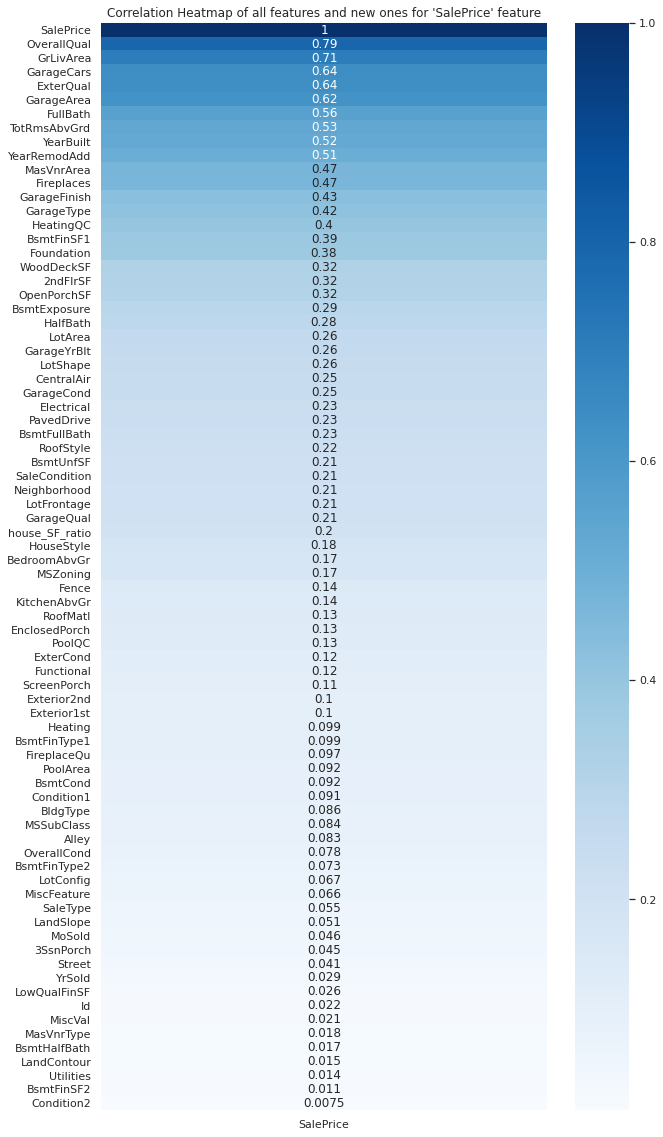

In [ ]:
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.heatmap(corr_price_new_features, annot=True, cmap='Blues')
ax = ax.set_title('Correlation Heatmap of all features and new ones for \'SalePrice\' feature')

# Step 10

Find a way to present the work you did (video, notebook, powerpoint presentation, app, ...)